In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer=pd.read_csv('https://mentorskool-platform-uploads.s3.ap-south-1.amazonaws.com/documents/1d284404-8a42-4278-93a0-0ef2d80ab555_83d04ac6-cb74-4a96-a06a-e0d5442aa126_customers.csv')
customer.drop('Unnamed: 0',axis=1,inplace=True)
customer.zip_code=customer.zip_code.astype('str')
customer.head()

,client_id,customer_name,home_address,city,state_code,zip_code,county,state,state_fips,age,workclass,education,marital-status,occupation,relationship,race,gender
0,1.0,Stewart Carmichael,650 E Indian School Rd,Phoenix,AZ,85012.0,Maricopa,Arizona,4.0,31.0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male
1,2.0,Rob Lucas,3601 S 6th Ave,Tucson,AZ,85723.0,Pima,Arizona,4.0,44.0,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male
2,3.0,Brendan Sweed,2615 E Clinton Ave,Fresno,CA,93703.0,Fresno,California,6.0,41.0,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male
3,4.0,Troy Staebel,950 Campbell Ave,West Haven,CT,6516.0,New Haven,Connecticut,9.0,32.0,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male
4,5.0,Tamara Willingham,1601 Kirkwood Hwy,Wilmington,DE,19805.0,New Castle,Delaware,10.0,26.0,?,Some-college,Never-married,?,Own-child,White,Female


In [3]:
trans=pd.read_csv('https://mentorskool-platform-uploads.s3.ap-south-1.amazonaws.com/documents/70c0aef3-b372-4813-9ab6-bab10e21c2df_83d04ac6-cb74-4a96-a06a-e0d5442aa126_transactions.csv')
trans.drop('Unnamed: 0',axis=1,inplace=True)
trans.transaction_date=pd.to_datetime(trans.transaction_date)
trans.head()

,trans_id,account_id,transaction_date,type,operation,amount,balance,k_symbol,account,payment_integration
0,1,1,2017-03-24,credit,deposit,1000.0,1000.0,NaN,NaN,NaN
1,5,1,2017-04-13,credit,transfer from account,3679.0,4679.0,NaN,41403269.0,SecurePay
2,199,1,2017-04-23,credit,deposit,12600.0,17279.0,NaN,NaN,NaN
3,3530438,1,2017-04-30,credit,NaN,19.2,17298.2,Interest,NaN,NaN
4,6,1,2017-05-13,credit,transfer from account,3679.0,20977.2,NaN,41403269.0,SecurePay


In [4]:
account=pd.read_csv('https://mentorskool-platform-uploads.s3.ap-south-1.amazonaws.com/documents/0f6880b6-c8c0-49c8-a911-e8d17d86ca2d_83d04ac6-cb74-4a96-a06a-e0d5442aa126_accounts.csv')
account.drop('Unnamed: 0',axis=1,inplace=True)
account.head()

,account_id,account_type,kyc_approved_on,kyc_manually_approved_on,account_creation_date,client_id,kyc_rejected_reason
0,1,MONTHLY CHARGE,2015-03-22 14:56:00,NaN,2015-03-24 00:00:00,1,NaN
1,2,MONTHLY CHARGE,2013-02-18 22:08:00,NaN,2013-02-26 00:00:00,2,Low Credit Score
2,3,MONTHLY CHARGE,2017-07-05 23:03:00,NaN,2017-07-07 00:00:00,3,NaN
3,4,MONTHLY CHARGE,2016-02-03 10:39:00,NaN,2016-02-21 00:00:00,4,NaN
4,5,MONTHLY CHARGE,2017-05-22 18:22:00,2017-05-29 08:16:00,2017-05-30 00:00:00,5,No Photograph


In [46]:
#extracting the month 
trans['month']=trans['transaction_date'].dt.month
#extracting the year
trans['year']=trans['transaction_date'].dt.year
#filtering the transaction data 
trans1=trans[trans['year']==2017]
#grouping the data to calculate MAU 
ans1=trans1.groupby(['month'])['account_id'].nunique().sort_values(ascending=False).reset_index()
#sorting the data according to month number and renameing the column
ans2=ans1.sort_values(by='month').rename(columns={'account_id':'MAU'})
ans2

,month,MAU
7,1,79
11,2,74
9,3,76
8,4,78
6,5,79
10,6,74
5,7,80
4,8,84
3,9,87
2,10,87


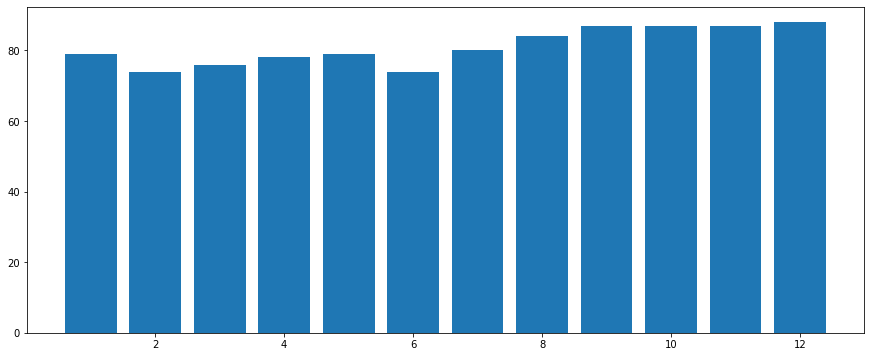

In [48]:
plt.figure(figsize=(15,6))
# taking month on x-axis and MAU on y-axis
plt.bar(ans2['month'],ans2['MAU'])
plt.show()

In [50]:
ans2['MAU_MOM_change'] = ans2['MAU'].pct_change() * 100
ans2

,month,MAU,MAU_MOM_change
7,1,79,NaN
11,2,74,-6.329114
9,3,76,2.702703
8,4,78,2.631579
6,5,79,1.282051
10,6,74,-6.329114
5,7,80,8.108108
4,8,84,5.000000
3,9,87,3.571429
2,10,87,0.000000


In [53]:
#calculating average of MAU_MOM_Change
average_mom_change = ans2['MAU'].mean()
print(average_mom_change)
#filtering the data as said
filtered_ans2 = ans2[ans2['MAU'] > average_mom_change]
print(filtered_ans2)

81.08333333333333
   month  MAU  MAU_MOM_change
4      8   84        5.000000
3      9   87        3.571429
2     10   87        0.000000
1     11   87        0.000000
0     12   88        1.149425


In [61]:
temp1=pd.merge(customer,account,on='client_id')
temp2=pd.merge(temp1,trans,how='outer',on='account_id')
temp3= temp2[['client_id','customer_name','state','trans_id','amount']]
temp4=temp3.groupby(['client_id','customer_name','state']).agg({'trans_id':'count','amount':'sum'})
temp4.rename(columns = {'trans_id':'total_transactions','amount':'total_amount'}, inplace = True)
temp4['ATV']=(temp4['total_amount']/temp4['total_transactions']).round(2)
temp4=temp4.fillna(0)
print(temp4)
Q3 = temp4.ATV.quantile(0.75)
print(Q3)
ans=temp4[temp4.ATV>Q3]
ans.sort_values('ATV',ascending=False)

                                          total_transactions  total_amount  \
client_id customer_name      state                                           
1.0       Stewart Carmichael Arizona                     238      375121.9   
2.0       Rob Lucas          Arizona                     477     3151322.6   
3.0       Brendan Sweed      California                  115      292252.2   
4.0       Troy Staebel       Connecticut                 185      350835.7   
5.0       Tamara Willingham  Delaware                     81      165809.3   
...                                                      ...           ...   
91.0      Chuck Magee        Alabama                      79      537083.8   
92.0      Gary Zandusky      Alabama                       0           0.0   
93.0      Jill Stevenson     Alabama                     143      488768.1   
94.0      Olvera Toch        Alabama                       0           0.0   
95.0      Cyma Kinney        Alabama                     216    

,,,total_transactions,total_amount,ATV
client_id,customer_name,state,,,
66.0,Trudy Glocke,Alabama,315,5878891.3,18663.15
30.0,Laurel Elliston,Alabama,280,4539867.2,16213.81
31.0,Jonathan Howell,Alabama,383,5807677.5,15163.65
82.0,Liz Thompson,Alabama,329,4804707.6,14603.97
72.0,Alan Barnes,Alabama,240,3268973.4,13620.72
67.0,Charles Crestani,Alabama,380,4513796.0,11878.41
18.0,Duane Noonan,Alabama,327,3728349.5,11401.68
16.0,Ruben Ausman,Oregon,59,661286.5,11208.25
84.0,Carlos Daly,Alabama,208,2317516.1,11141.90


In [71]:
#fetching the required columns
temp6= temp2[['state','trans_id','amount']]
#print(temp6)
temp7=temp6.groupby(['state']).agg({'trans_id':'count','amount':'sum'}).reset_index()
#print(temp7)
temp7.rename(columns = {'trans_id':'total_transactions','amount':'total_amount'}, inplace = True)
#print(temp7)
temp7['ATV']=(temp7['total_amount']/temp7['total_transactions']).round(2) 
temp7=temp7.fillna(0) 
sumtotal_amount=temp7['total_amount'].sum() 
temp7['%contribution']=(temp7['total_amount']/sumtotal_amount)*100
ans3=temp7.sort_values('ATV',ascending=False)
ans4=ans3.head()
ans4

,state,total_transactions,total_amount,ATV,%contribution
14,Oregon,59,661286.5,11208.25,0.499616
6,Florida,128,1185819.7,9264.22,0.895911
15,Pennsylvania,53,412685.9,7786.53,0.311793
7,Idaho,252,1708291.7,6778.94,1.290650
9,Mississippi,154,1038180.0,6741.43,0.784366


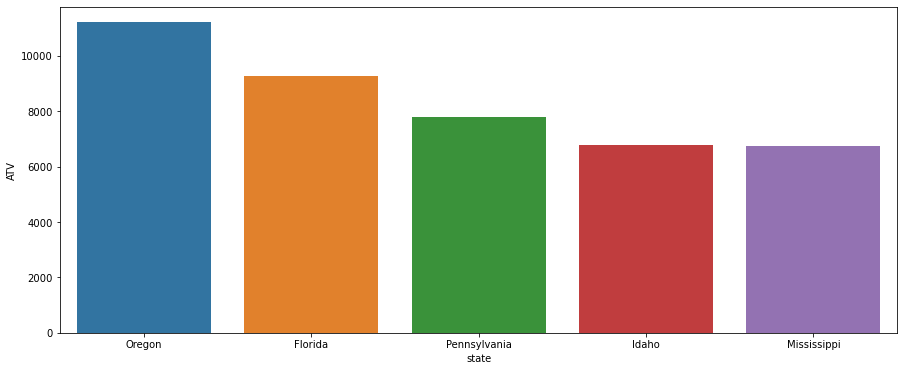

In [73]:
plt.figure(figsize=(15,6))
# taking state on x-axis and ATV on y-axis
sns.barplot(x='state',y='ATV',data=ans4)
plt.show()